In [1]:
#Importing modules 
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  

In [2]:
# Preprocessing phase.
#Importing the data
dataset = pd.read_csv('/home/isaactra/Desktop/Gomycode/train.csv', encoding = 'ISO-8859-1')

#Displaying the data
display(dataset)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
#Preview the first 5 lines of the imported data 
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#See general information about the data columns and values.
dataset.info() #General dataset info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
dataset.columns #Display columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
dataset.values #Display Values

array([[1, 0, 3, ..., 7.25, nan, 'S'],
       [2, 1, 1, ..., 71.2833, 'C85', 'C'],
       [3, 1, 3, ..., 7.925, nan, 'S'],
       ...,
       [889, 0, 3, ..., 23.45, nan, 'S'],
       [890, 1, 1, ..., 30.0, 'C148', 'C'],
       [891, 0, 3, ..., 7.75, nan, 'Q']], dtype=object)

In [7]:
#find missing information
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#replace missing information with the appropriate values.
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].mean()) #Filling missing ages values

dataset['Cabin'].value_counts() #Finding the most frequent occuring value in the Cabin column
dataset['Cabin'] = dataset['Cabin'].fillna('G6') #Filling missing cabin values

dataset['Embarked'].value_counts() #Finding the most frequent occuring value in the Embarking column
dataset['Embarked'] = dataset['Embarked'].fillna('S') #Filling missing Embarked values

dataset.isnull().sum() #Verify if the data is ready to be treated

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [9]:
#Visualize the correlation between Sex and Age and the importance of age and sex in the survival of the individuals.

#Data transformation
gender1 = ['Sex']
main_gender = pd.get_dummies(dataset[gender1], dummy_na=False, drop_first = True)
main_gender.head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [10]:
#Replacing the Sex column with the transformed data
dataset = pd.concat([dataset, main_gender], axis=1)
dataset = dataset.drop(gender1, axis=1) #Drop exisiting Sex feature
dataset.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,G6,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,G6,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,G6,S,1


/home/isaactra/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 23.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


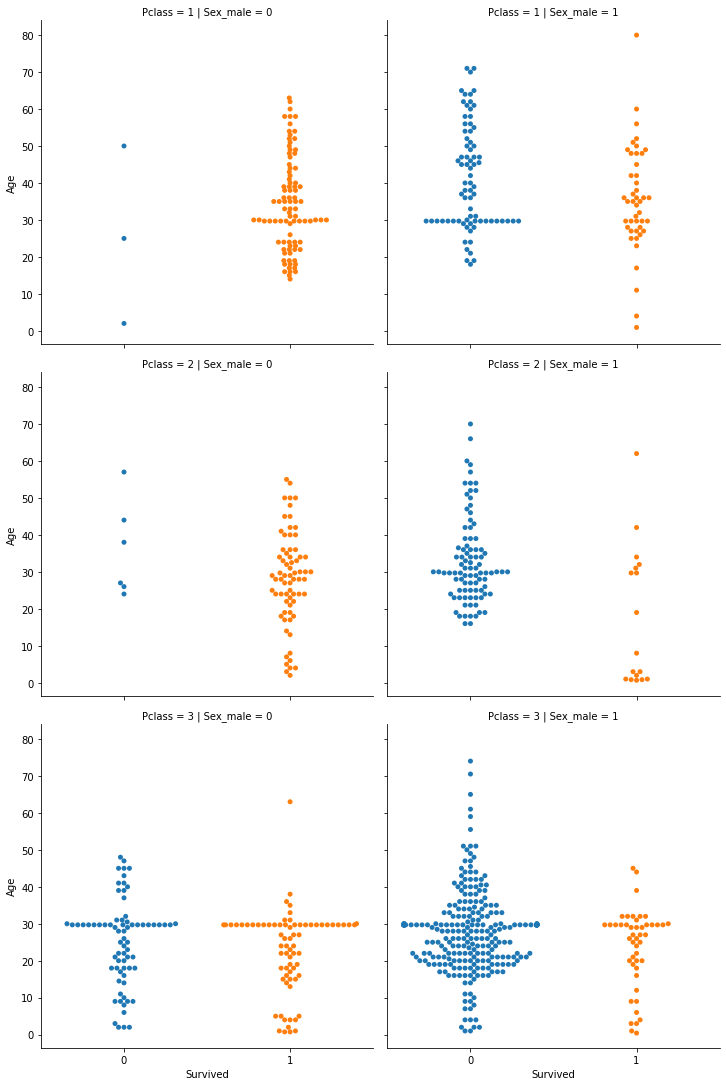

In [11]:
#Distribution of important features
sns.catplot(data=dataset, x='Survived',y='Age',col='Sex_male',row='Pclass', kind='swarm')

<AxesSubplot:>

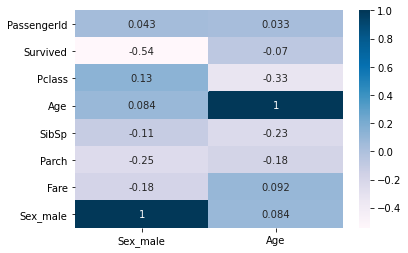

In [12]:
#Correlation between Sex and Age
sns.heatmap(dataset.corr()[['Sex_male', 'Age']],annot=True, cmap='PuBu')

<AxesSubplot:>

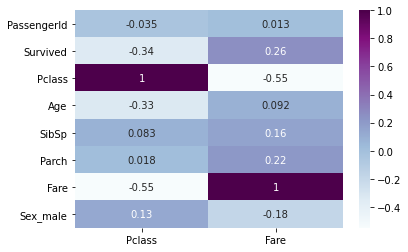

In [13]:
#Correlation between Pclass and Fare
sns.heatmap(dataset.corr()[['Pclass', 'Fare']],annot=True, cmap='BuPu')

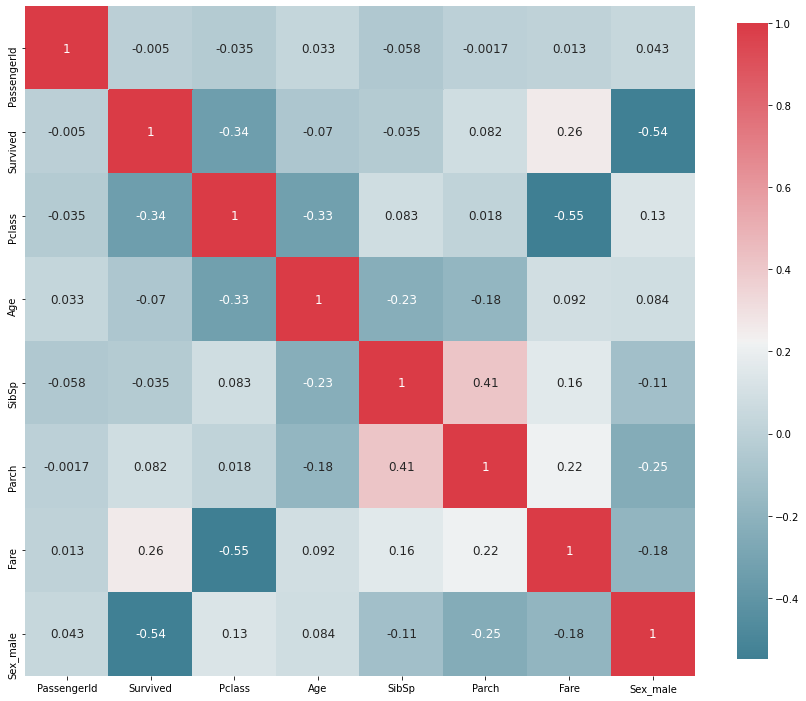

In [14]:
#Study the given fonction

def plot_correlation_map(dataset):
    corr = dataset.corr()
    s , ax = plt.subplots(figsize =(15 , 13))
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(corr, cmap = cmap,square=True,cbar_kws={ 'shrink' : .9 },ax=ax,annot = True,annot_kws = { 'fontsize' : 12 })
    
    
plot_correlation_map(dataset) #Display the function

In [15]:
#This function is the correlation of all the values of the dataset
#After analysing we can deduct that the survival of a passenger stronglly depends on the Fare, the Parch and the Age.
# We can conclud that there were more survivors on the most expensive Pclasses